**Author:** Matt Sarmiento

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Wrangle" data-toc-modified-id="Data-Wrangle-1">Data Wrangle</a></span></li><li><span><a href="#2017-Mortality-Figure" data-toc-modified-id="2017-Mortality-Figure-2">2017 Mortality Figure</a></span></li></ul></div>

In [1]:
# Third-party imports

In [2]:
# Load rpy2 extension (may need to re-run)
%reload_ext rpy2.ipython

In [160]:
# Load R libraries
%R library(ggplot2, scales)

array(['ggplot2', 'tools', 'stats', 'graphics', 'grDevices', 'utils',
       'datasets', 'methods', 'base'], dtype='<U9')

-------------

# Data Wrangle

In [4]:
# Total drug fatalities in 2017
# Source: https://www.cdc.gov/nchs/data-visualization/drug-poisoning-mortality/#data-tables
drugs2017 = 70,237

# Total fatalties in Vietnam
# Source: https://www.archives.gov/research/military/vietnam-war/casualty-statistics
vietnam = 58,220

# Total fatalties in Iraq, Afghanistan
# Source: http://www.icasualties.org
iraq = 4889
afghanistan = 3563

------------------

# 2017 Mortality Figure

In [153]:
%%R 

# Custom theme
theme_custom <- theme(plot.title = element_text(size = 24, colour = "grey40"))

# Colours
highlight = "#C62F2F"
med = "grey40"
light = "grey55"

# Text sizes
tmed = 10
tsmall = 8

# Position vars for annotation alignment, sorted per line
x1 <- 0.4; y1 <- 3.0
x2 <- x1; y2 <- (y1 - 0.6)
x3 <- x1; y3 <- (y2 - 0.5)
x4 <- x1; y4 <- (y3 - 0.5)

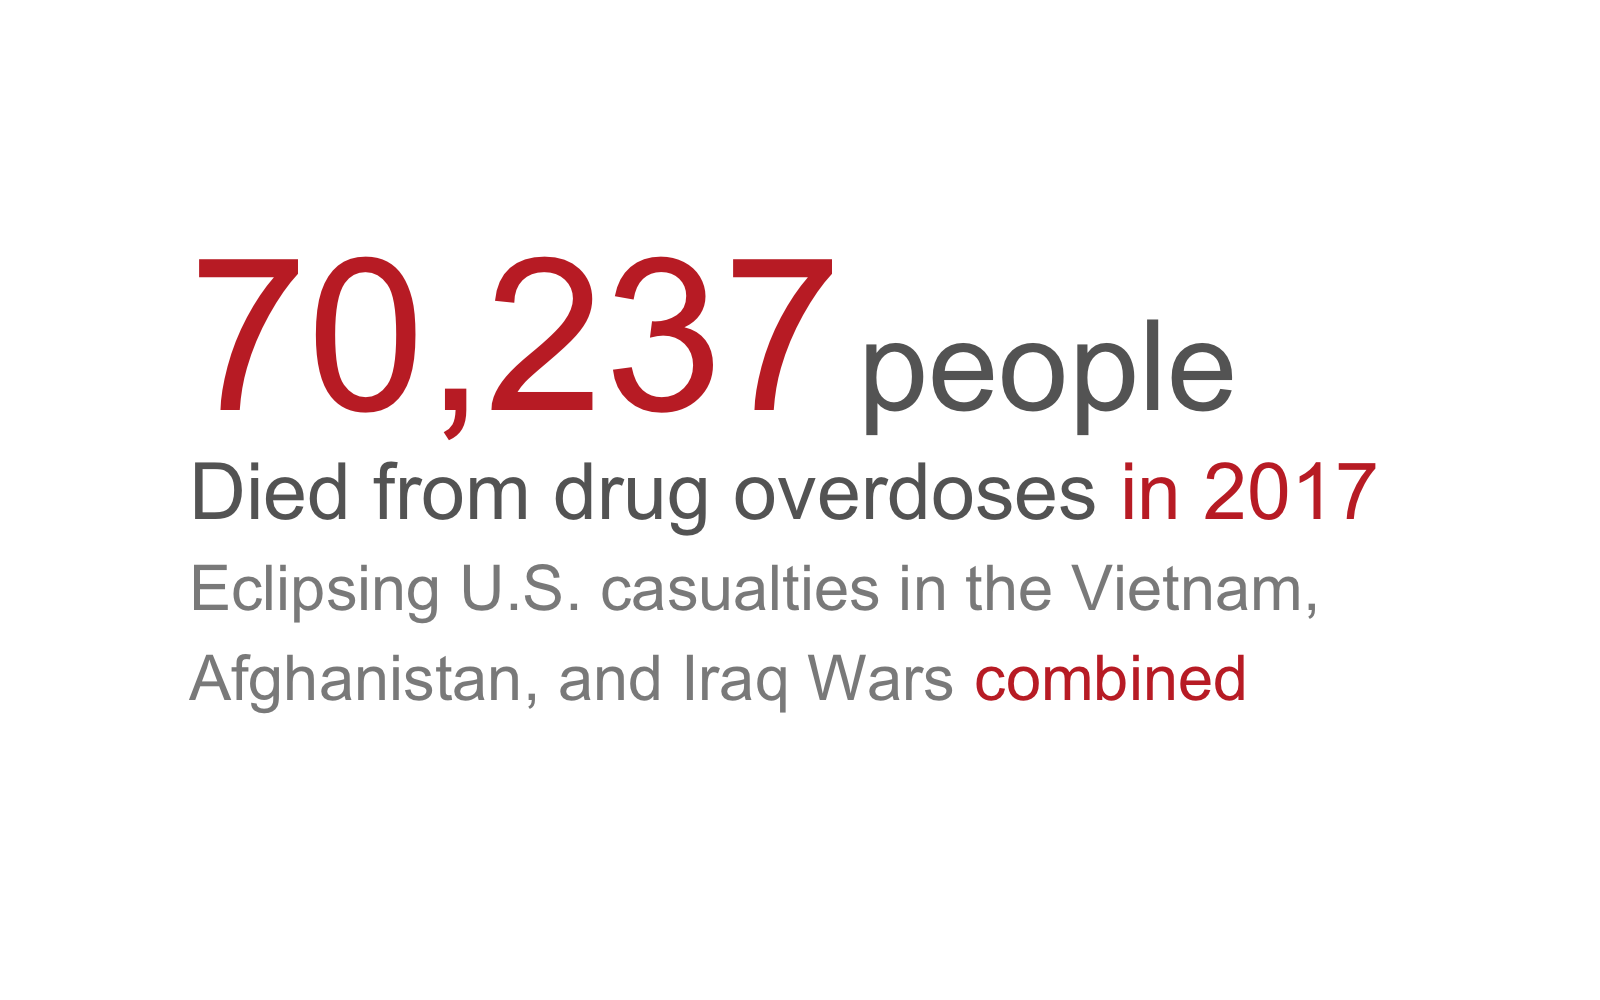

In [159]:
%%R -w 8 -h 5 -u in -r 200

# Base
q <- ggplot()

# Edit axes scales
q <- (q + scale_x_continuous(limits = c(0, 5)) +
          scale_y_continuous(limits = c(0, 5)))

# Adds fatalities figures
# 1st line
q <- q + annotate("text", label = "70,237", x = x1, y = y1, size = 27, colour = highlight, hjust = 0, vjust = 0)
q <- q + annotate("text", label = "people", x = (x1 + 2.3), y = y1, size = 16, colour = med, 
                  hjust = 0, vjust = 0)

# 2nd line 
q <- q + annotate("text", label = "Died from drug overdoses", x = x2, y = y2, size = tmed, colour = med,
                  hjust = 0, vjust = 0)
q <- q + annotate("text", label = "in 2017", x = (x2 + 3.2), y = y2, size = tmed, colour = highlight,
                  hjust = 0, vjust = 0)

# 3rd line
q <- q + annotate("text", label = "Eclipsing U.S. casualties in the Vietnam,", x = x3, y = y3, 
                  size = tsmall, colour = light, hjust = 0, vjust = 0)
q <- q + annotate("text", label = "Afghanistan, and Iraq Wars", x = x4, y = y4, size = tsmall, colour = light, 
                  hjust = 0, vjust = 0)
q <- q + annotate("text", label = "combined", x = (x4 + 2.7), y = y4, size = tsmall, colour = highlight,
                  hjust = 0, vjust = 0)
      
# Adds title
# q <- q + labs(title = "\nIn 2017")

# Edit themes
q <- q + theme_void() + theme_custom

q